In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from scipy.optimize import curve_fit

from Analysis.utils import SigTools as sg

In [6]:
collpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/'
dirpath  = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/LiF10_108/'
filepath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/LiF10_108/it_4.txt'

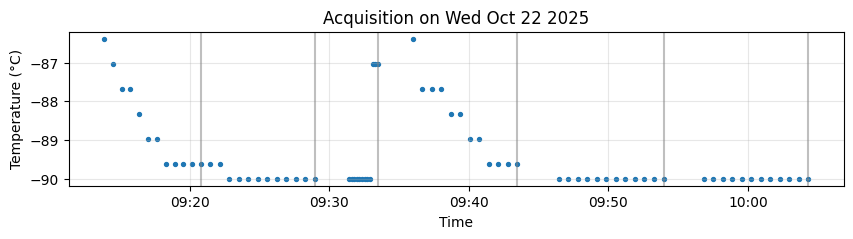

In [3]:
collpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-II/Coll2/'
times, temps, cuts = sg.get_coll_temp_timeline(collpath)
fig, ax = sg.plot_temp_timeline(times, temps, cuts = cuts)

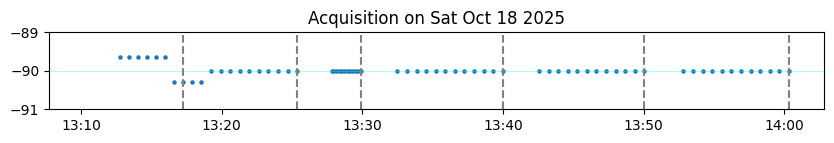

In [30]:
collpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-II/Coll1/'
times, temps, cuts = sg.get_coll_temp_timeline(collpath)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,1))

ax.axhline(-90, color = 'cyan', alpha = 0.5, linewidth = 0.5)

ax.scatter(times, temps, s = 5)
ax.set_ylim(-91, -89)

# Format x-axis: only hours:minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

if len(times) > 0:
    date_title = times[0].strftime("%a %b %d %Y")  # e.g. "Fri Oct 17 2025"
    ax.set_title(f"Acquisition on {date_title}")

for cut in cuts:
    ax.axvline(cut, color='grey', linestyle = '--')


In [13]:
amp = sg.get_spectrum_amp(x,y, 620)
print(amp)

908.0


(0.0, 1869.345)

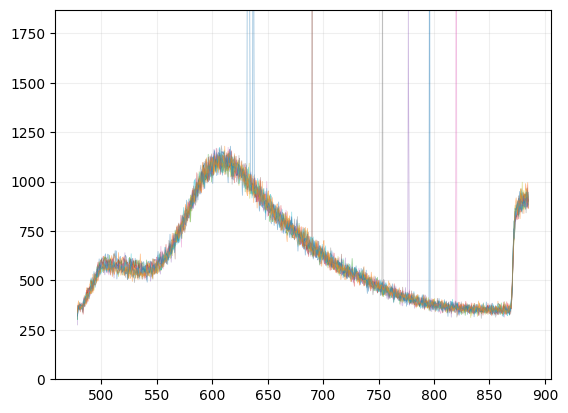

In [34]:
dirpath  = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/LiF10_107/'

i = 0
while True:
    try:
        x, y = sg.read_spectrum(os.path.join(dirpath, f'it_{i}.txt'))
        plt.plot(x,y, linewidth = 0.5, alpha = 0.5)
        i+=1
    except:
        break

plt.grid("on", alpha = 0.2)
plt.ylim(0, 3 * np.mean(y))

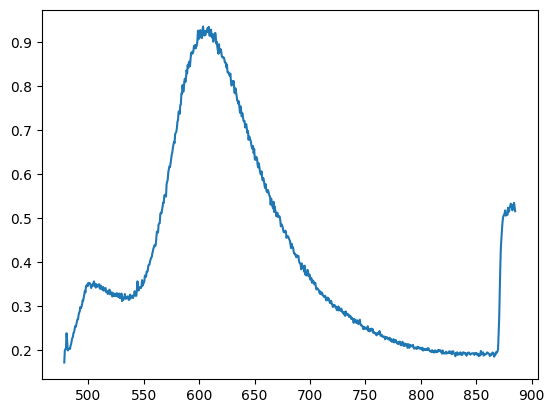

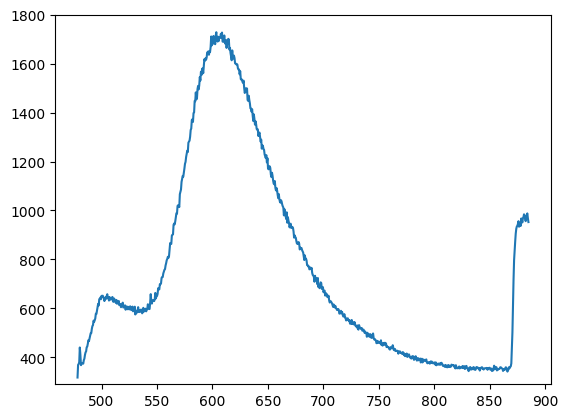

(290.0, 1800.0)

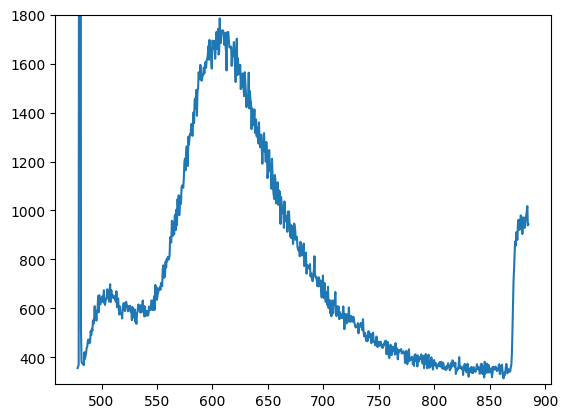

In [8]:
x, y = sg.read_spectrum(filepath)
it_mtx       = sg.gen_iteration_matrix(dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

factor       = 30*4*15.4
fin_arr      = sg.scale_array(combined_arr, factor)

plt.plot(x, fin_arr)
plt.show()

plt.plot(x,combined_arr)
plt.ylim(290, 1800)
plt.show()

plt.plot(x,y)
plt.ylim(290, 1800)

In [5]:
acq_dict = sg.read_acquisition_data(filepath)
timestamp = acq_dict['Date and Time']
temp      = float(acq_dict['Temperature (C)'])

In [6]:
temp

-90.0

In [13]:
str(acq_dict['Date and Time'])

'Fri Oct 17 07:05:23.249 2025'

In [15]:
from datetime import datetime

s = str(acq_dict['Date and Time'])
dt = datetime.strptime(s, "%a %b %d %H:%M:%S.%f %Y")

print(dt)


2025-10-17 07:05:23.249000


In [5]:
sg.get_coll_temp_timeline(collpath)

AM
BL
H2O
LiF10_106
LiF10_107
LiF10_108


(470.0, 700.0)

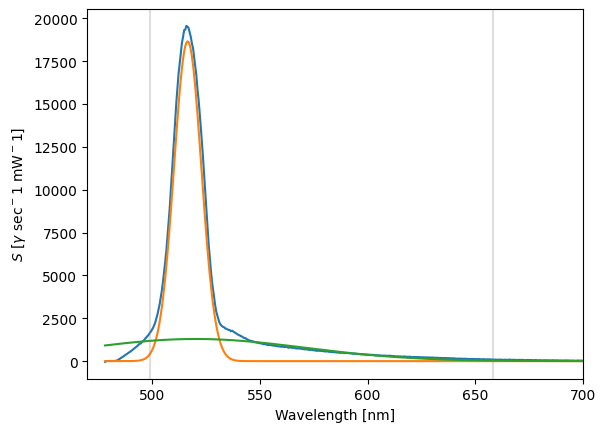

In [6]:
# Get baseline
bl_dirpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/BL/'
x, _       = sg.read_spectrum(os.path.join(bl_dirpath, 'it_0.txt'))
it_mtx       = sg.gen_iteration_matrix(bl_dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

bl = np.mean(combined_arr)

# Ramana Scratchpad
dirpath  = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/H2O/'
x, _     = sg.read_spectrum(os.path.join(dirpath, 'it_0.txt'))

it_mtx       = sg.gen_iteration_matrix(dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

# subtract baseline
combined_arr = sg.remove_baseline(combined_arr, bl)

factor       = 1 #0.5*4*15.4
fin_arr      = sg.scale_array(combined_arr, factor)


# --------------------------------------------------------------------
def gaussian(x, a, s, m):
    return a * np.exp(-((x-m)**2)/(2*(s**2)))

def double_gaussian(x, a1, s1, m1, a2, s2, m2):
    return gaussian(x, a1, s1, m1) + gaussian(x, a2, s2, m2)


l_cut = 40
u_cut = 350
x_fit = x[l_cut:u_cut]
y_fit = fin_arr[l_cut:u_cut]

a1 = np.max(fin_arr)
s1 = 25
m1 = 510

a2 = a1/60
s2 = 2*s1
m2 = 530

p0 = (a1, s1, m1, a2, s2, m2)
popt, pcov = curve_fit(double_gaussian, x_fit, y_fit, p0=p0)

popt = np.array(popt)

plt.plot(x, fin_arr)
plt.plot(x, gaussian(x, *popt[:3]))
plt.plot(x, gaussian(x, *popt[3:]))

plt.xlabel("Wavelength [nm]")
plt.ylabel(f"$S$ [$\\gamma$ sec$^{-1}$ mW$^{-1}$]")

plt.axvline(x[l_cut], color='grey', alpha = 0.25)
plt.axvline(x[u_cut], color='grey', alpha = 0.25)

plt.xlim(470, 700)


In [ ]:
# Get baseline
bl_dirpath = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/BL/'
x, _       = sg.read_spectrum(os.path.join(bl_dirpath, 'it_0.txt'))
it_mtx       = sg.gen_iteration_matrix(bl_dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

bl = np.mean(combined_arr)

# Ramana Scratchpad
dirpath  = '/home/hargy/Scientific/DataCold/Experimental-Data/Project-Phoenix/PHASE-I/Coll2/H2O/'
x, _     = sg.read_spectrum(os.path.join(dirpath, 'it_0.txt'))

it_mtx       = sg.gen_iteration_matrix(dirpath)
combined_arr = sg.combine_iterations(it_mtx, method='mean-weighted')

# subtract baseline
combined_arr = sg.remove_baseline(combined_arr, bl)

factor       = 1 #0.5*4*15.4
fin_arr      = sg.scale_array(combined_arr, factor)

popt = sg.get_raman_gaussian(x, fin_arr)

array([ 1.86648262e+04,  6.34197871e+00,  5.16605405e+02,  1.29349486e+03,
       -5.04583288e+01,  5.20338937e+02])

In [ ]:
popt